## Labo Week 6 

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve


# import scipy.spatial.distance as scipy
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# from sklearn.metrics import accuracy_score


### **Deel 1** **Alternatieve metrieken om modellen te vergelijken**


**Oefening 1** : 

Gebruik voor deze oefening de cijfers.txt datafile uit labo 5. Stel 2 verschillende classificatiemethoden op : (lineaire model en decision trees) en gebruik onderstaande metrieken om de 2 modellen te vergelijken. 

**1.1** Gebruik 25% van de data om te testen en bereken van beide alvast de klassieke accuracy.



In [2]:
#1.1
cijfers = pd.read_csv('Week5/cijfers.txt', names = ['Examen1', 'Examen2', 'Toegelaten'])


X_train, X_test, y_train, y_test = train_test_split(cijfers[['Examen1', 'Examen2']], cijfers['Toegelaten'], test_size=0.25, random_state=69)

print("lineair")
lr = LogisticRegression(random_state=10).fit(X_train, y_train)
pred_logreg = lr.predict(X_test)
print(f"Training set score: {lr.score(X_train, y_train)}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

#Decision Trees
print("\nD trees")
tree = DecisionTreeClassifier(max_depth=3, random_state=4)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.3f}")

#print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
#print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

lineair
Training set score: 0.92
Test set score: 0.80

D trees
Accuracy on training set: 0.960
Accuracy on test set: 0.880



**1.2** Bereken daarna de confusion matrix van beide modellen, gebruik hierbij :
```
from sklearn.metrics import confusion_matrix
```


In [3]:
#1.2
print(f"Confusion matrix LogistRegression :\n{confusion_matrix(y_test, pred_logreg)}")
print(f"Confusion matrix Decision Tree :\n{confusion_matrix(y_test, pred_tree)}")


Confusion matrix LogistRegression :
[[ 7  3]
 [ 2 13]]
Confusion matrix Decision Tree :
[[ 8  2]
 [ 1 14]]



**1.3** Bepaal nu de precision, recall en F1 score via :
```
from sklearn.metrics import classification_report
```


In [4]:
#1.3
print(f"lineair:\n{classification_report(y_test, pred_logreg)}")
print(f"tree:\n{classification_report(y_test, pred_tree)}")

lineair:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.81      0.87      0.84        15

    accuracy                           0.80        25
   macro avg       0.80      0.78      0.79        25
weighted avg       0.80      0.80      0.80        25

tree:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.88      0.93      0.90        15

    accuracy                           0.88        25
   macro avg       0.88      0.87      0.87        25
weighted avg       0.88      0.88      0.88        25




**1.4** Teken ten slotte de ROC curve. Hiervoor moet je de false positive rate uitzetten t.o.v de true positive rate. Je zal eerst voor elk element in de test set de kans om terecht te komen in de true state (toeglaten) moeten berekenen, dit kan via de methode : 
```
modellogistRegr.predict_proba(x_Examtest)[:,1]
```
Via de 
```
from sklearn.metrics import roc_curve
```
kan je nu de false positive en true positive rate berekenen en kan je deze plotten t.o.v. elkaar

_Tip:_ [Goeie blog rond de verschillende technieken](https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a)


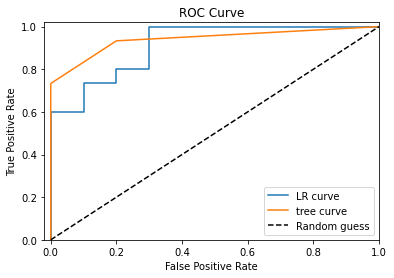

In [5]:
#1.4
y_pred_prob_lr = lr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)

plt.plot(fpr, tpr, label='LR curve')
y_pred_prob_tree = tree.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tree)

plt.plot(fpr, tpr, label='tree curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

### **Deel 2** Het effect van schalen van data

Het schalen van features kan een grote impact hebben op het eindresultaat van sommige algoritmen, terwijl bij andere er amper een effect te zien is. Wanneer de dataset features bevat die heel erg variëren in grootte, eenheden en ranges en je een algoritme wil gebruiken dat afhankelijk is van de Euclidische afstandsmaat is het een goed idee om je data eerst de schalen.

**Oefening 2** 
Hergebruik in deze oefening de _auto\_extra.txt_ datafile met het _mpg_ regressie probleem. 

 **2.1**  Maak een boxplot van de featuredata om te zien hoe deze varieert in grootte en schaal t.o.v. elkaar. Info over maken van boxplots : https://matplotlib.org/3.2.1/gallery/pyplots/boxplot_demo_pyplot.html
 Teken deze boxplots opnieuw na schaling van de data door de varianten MinMaxScaler, standardScaler, RobustScaler
 
 **2.2** Test enkele algoritmen die je kent (Lineaire regressie, Lasso, Ridge, KNN, DecisionTree, RandomForest, ...) en ga na welke hiervan baat hebben bij schaling op deze data (probeer de varianten MinMaxScaler, StandardScaler, RobustScaler).
 Geef je resultaten weer in een pandas dataframe. Je mag van elk algoritme de default parametersettings gebruiken, op die manier kan je het opstellen en fitten van al deze modellen op een algemene manier via een functie doen, waarbij je een lijst van scalers en een lijst van modellen meegeeft als argument.
 Bvb :
  ```
 def runScalers(models, scalers)
 ```

In [6]:
data = pd.read_table('Week5/auto_extra.txt', delim_whitespace=True)
data["horsepower"] = pd.to_numeric(data["horsepower"],errors='coerce')
data = data.dropna()
print(data.info())
features = data.iloc[:,1:8]
target = data.iloc[:,0:1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   modelyear     392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB
None


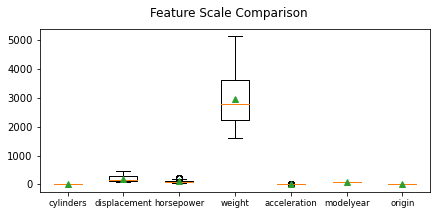

In [7]:
names =features.columns

def featureBoxPlot(X, names, title):
    plt.rcParams["figure.figsize"] = [7,3]
    fig = plt.figure()
    fig.suptitle(title)
    ax = fig.add_subplot()
    plt.boxplot(X, showmeans=True)
    ax.set_xticklabels(names, fontsize = 8.5)
    plt.show()
    return

featureBoxPlot(features.values, names,"Feature Scale Comparison")

In [8]:
#2.2


### **Deel 3** Unsupervised learning : clusteren

**Oefening 3** 

Gegeven volgende artificiële data :

          X         Y color
0 -1.116517  0.543782   red
1  0.082874 -1.732603   red
2 -1.476895  0.026373   red
3 -0.962956 -1.440892   red
4  0.181903  0.579127   red


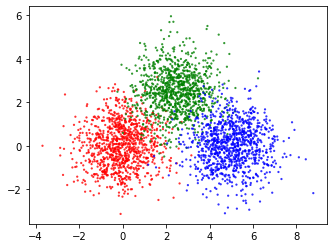

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

N = 1000 
test = pd.DataFrame(np.random.normal(size=(3*N,2)))
test.loc[0:N,2] = 'red'
test.loc[N:2*N,2] = 'green'
test.loc[2*N:3*N,2] = 'blue'
test.columns=['X', 'Y', 'color']
test.iloc[N:2*N,0:2] += 2.5
test.iloc[2*N:3*N,0] += 5

print(test.head())

plt.scatter(test.iloc[:,0], test.iloc[:,1], alpha=0.8, c=test.iloc[:,2], edgecolors='none', s=5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

   __3.1__ Gebruik k-means(++)  om de gecreërde clusters terug te vinden. Visualiseer de cluster opnieuw en vergelijk met de oorspronkelijke plot. Varieer met de waarde k. 
   

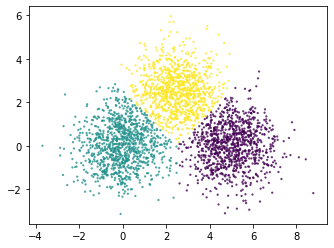

In [10]:
#3.1 k-means clustering

kmeans = KMeans(n_clusters=3)
kmeans.fit(test[['X', 'Y']])

#predict the labels/colors of clusters. (y_pred)
Color_predict = kmeans.predict(test[['X', 'Y']])

plt.scatter(test.iloc[:,0], test.iloc[:,1], alpha=0.8, c=Color_predict,edgecolors='none', s=5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

   __3.2__ Probeer de ideale k-waarde te vinden via enerzijds :
       * de Elbow methode om de optimale waarde voor k te bepalen. Hiertoe gebruik je een score functie. Vergelijk tussen twee score functies:
        - inertia of de SSE score :  deze berekent de som van de kwadraten van de afstand van elk punt tot zijn cluster center en kan je gewoon opvragen aan je Kmeans model 
        - Distortion score : Deze berekent de gemiddelde afstand van een punt tot zijn clustercentrum. Gebruik de functie cdist om de  de Euclidische afstand te berekenen.   
    ```
    from scipy.spatial.distance import cdist
    ```
     
      * Ga ook na hoe je de silhouette score kan gebruiken om een keuze van k te maken.  Bereken de Silhouette score van je modellen via : 
 ```
 from sklearn.metrics import silhouette_score
 ```
 

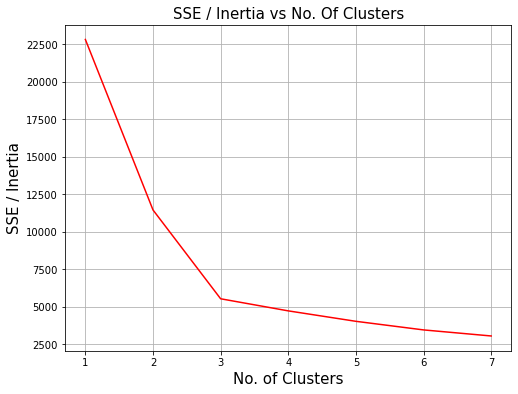

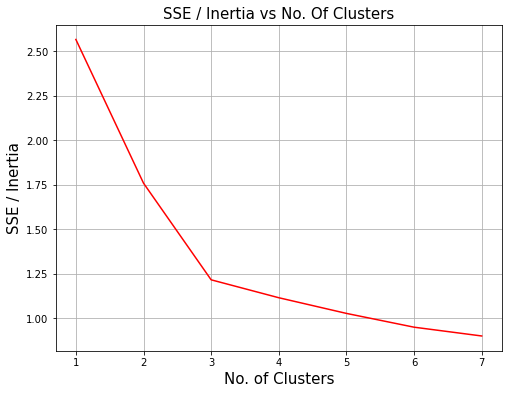

Silhouetter Score: 0.329


In [11]:
#3.2 Elbow methode

inertia_values = []
distances = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(test[['X', 'Y']])
    Color_predict = kmeans.predict(test[['X', 'Y']])
    inertia_values.append(kmeans.inertia_)
    #distances.append(cdist(test[['X', 'Y']], kmeans.cluster_centers_, metric='euclidean'))
    distances.append(sum(np.min(cdist(test[['X', 'Y']], kmeans.cluster_centers_,'euclidean'),axis = 1)) / test.shape[0])
    
        
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1, 8), inertia_values, color='red')
plt.xlabel('No. of Clusters', fontsize=15)
plt.ylabel('SSE / Inertia', fontsize=15)
plt.title('SSE / Inertia vs No. Of Clusters', fontsize=15)
plt.grid()
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1, len(distances)+1), distances, color='red')
plt.xlabel('No. of Clusters', fontsize=15)
plt.ylabel('SSE / Inertia', fontsize=15)
plt.title('SSE / Inertia vs No. Of Clusters', fontsize=15)
plt.grid()
plt.show()


score = silhouette_score(test[['X', 'Y']], kmeans.labels_, metric='euclidean')
print(f'Silhouetter Score: {score:.3f}')

 
  __3.3__ Wat geeft DBSCAN op deze convexe data? Plot je resultaat naast de oorspronkelijke data.
    Bereken ook de silhouette score voor DBSCAN.
 

In [12]:
#3.3 DBSCANb
dbsc = DBSCAN(eps=1, min_samples=3).fit(test[['X', 'Y']])
labels = dbsc.labels_

arr = np.array(labels)
print(np.unique(arr))


print("Silhouette Coefficient: %0.3f"% silhouette_score(test[['X', 'Y']], labels))

[-1  0]
Silhouette Coefficient: 0.461


### Deel 4 : Neurale Netwerken 

**Oefening 4**
Gegeven onderstaande 2 dimensionale data verkregen door toepassing van de Xor functie. 

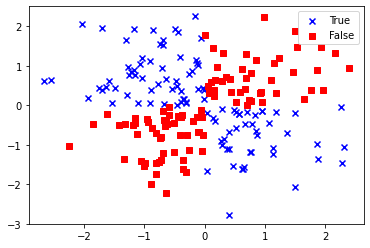

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
#y_xor = np.where(y_xor, 1, -1) # map True -> 1 , False -> -1
plt.scatter(X_xor[y_xor, 0], X_xor[y_xor, 1], c='b', marker='x', label='True')
plt.scatter(X_xor[y_xor == False, 0], X_xor[y_xor== False, 1], c='r', marker='s', label='False')
plt.ylim(-3.0)
plt.legend()
plt.show()


__4.1__ Ga na hoe een multi layer perception model presteert op deze data. Gebruik niet de default instellingen van de parameters maar onderzoek telkens met welke instellingen het leermodel minimaal / maximaal presteert. Je kan de evaluatie van je settings visueel beoordelen door de decision boundary te plotten (gebruik hiertoe weer een grid van (x,y) coördinaten die de volledige rechthoek omvat - zie code onderaan) Maar uiteraard zou je ook een grid_search kunnnen uitvoeren en de accuracies vergelijken.

Vermits de data 'netjes' gegenereerd werd hoef je hier geen schaling toe te passen.

In [14]:
x1_min, x1_max = X_xor[:, 0].min() - 1, X_xor[:, 0].max() + 1
x2_min, x2_max = X_xor[:, 1].min() - 1, X_xor[:, 1].max() + 1
print(x1_min, x1_max)
print(x2_min, x2_max)

grid = np.mgrid[x1_min:x1_max:0.01, x2_min:x2_max:0.01].reshape(2,-1).T

-3.659172237996741 3.383144774863942
-3.77259275642665 3.2567234972982093


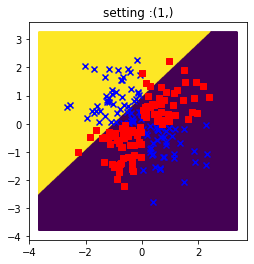

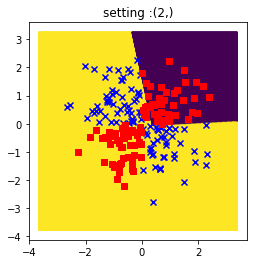

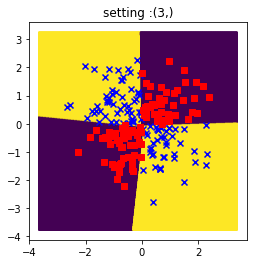

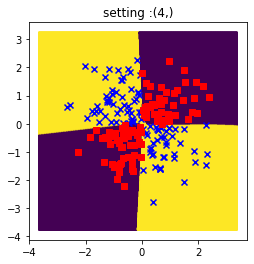

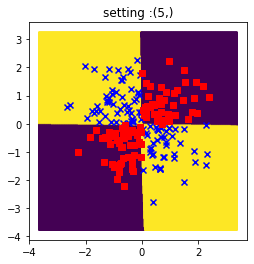

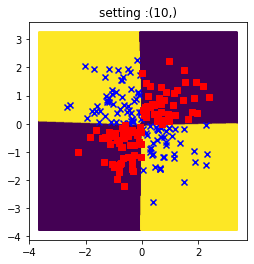

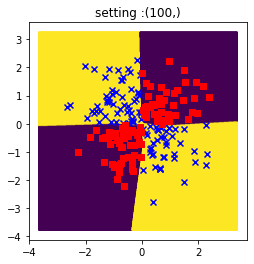

In [15]:
#4.1
from sklearn.neural_network import MLPClassifier
nr_of_nodes = [1,2,3,4,5,10,100]
for nodes in nr_of_nodes:
    hls = (nodes,)
    
    mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes = hls).fit(X_xor, y_xor)
    predictor = mlp.predict(grid)
    
    plt.scatter(grid[:,0], grid[:,1], c=predictor, edgecolors='none', s=2)
    plt.scatter(X_xor[y_xor, 0], X_xor[y_xor, 1], c='b', marker = 'x', label='true')
    plt.scatter(X_xor[y_xor == False, 0], X_xor[y_xor== False, 1], c='r', marker='s', label='false')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('setting :' + str(hls))
    plt.show()